###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data file into a dataframe object : df
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')

In [3]:
# Display the first 5 observation of the dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
#Display a concise summary of the provided data and list out 2 observations/inferences 
#that you observe from the result. You can use the info() method for this.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

(7050, 16)

* There are two catagorical variables amongst all the features and rest are continuous.
* This dataset has 7050 rows and 16 columns.
* Column1, Column2, Column3 and Column4: Each features have total 6.25% missing values(NaN).

In [5]:
# Perform EDA viz. Is there any missing values in each column of the provided dataset

def missing_values(df):
    ''' This function takes a data frame as input 
    prints the fraction of entries with missing values (NaN)
    prints the list of columns with corresponding number of missing values
    '''
    # Total number of entries (rows X columns) in the dataset
    total= df.size
    #Number of missing values per column
    missingCount = df.isnull().sum()
    #Total number of missing values
    missing_tot = missingCount.sum()
    # Calculate percentage of missing values
    #print('general info of dataframe \n\n\n\n',df.info())
    print(f'Total number of missing values for each column of dataframe: \n \b \b \b',missingCount)
    print("The dataset contains", round(((missing_tot/total) * 100), 2), "%", "missing values.\n\n\n")
    
    
def column_missingdata(df):
    ''' This function takes a data frame as input 
    prints the list of columns with corresponding % of missing values
    '''
    #check for missing values per column
    values=df.isnull().sum()#.sort_values(ascending=False)
    total= df.size
    #percentage of missing values per column
    percentage=(values/total) * 100
    print(f'% of missing values for each column of dataframe: \n \b \b \b',percentage,'\n\n\n')

def plot_missingdata(df:pd.DataFrame, title:str, xlabel:str, ylabel:str):
    ''' This function takes a data frame as input 
    plots the list of columns with corresponding total number of missing values
    '''
    # Let us see what columns have missing values
    # total number of missing values for each dataframe column
    missing = df.isnull().sum() 
    # keeping only the columns with missing values>0 
    missing = missing[missing > 0] 
    # sorting in order of missing values and making the change to original missing series
    missing.sort_values(inplace=True) 
    missing.plot.bar(color='blue')
    plt.title(title, size=15)
    plt.xticks(fontsize=11,rotation=45)
    plt.yticks(fontsize=11)
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.show()

Total number of missing values for each column of dataframe: 
    status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64
The dataset contains 25.0 % missing values.



% of missing values for each column of dataframe: 
    status_id           0.00
status_type         0.00
status_published    0.00
num_reactions       0.00
num_comments        0.00
num_shares          0.00
num_likes           0.00
num_loves           0.00
num_wows            0.00
num_hahas           0.00
num_sads            0.00
num_angrys          0.00
Column1             6.25
Column2             6.25
Column3             6.25
Column4             6.25
dtype: float6

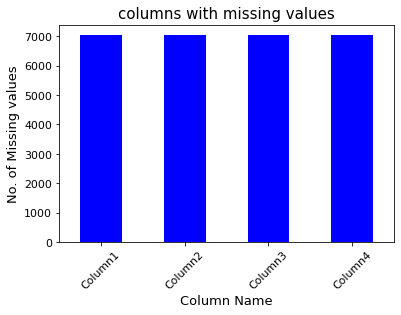

In [6]:
missing_values(df)
column_missingdata(df)
plot_missingdata(df,'columns with missing values','Column Name','No. of Missing values')

In [7]:
# Display all the unique status_type of the dataframe
print(df.status_type.unique())

['video' 'photo' 'link' 'status']


In [8]:
#Convert categorical variable, i.e., status_type into numerical 
#representation using a label encoder
import numpy as np
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['status_type'] = labelencoder.fit_transform(df['status_type'])
df['status_published'] = labelencoder.fit_transform(df['status_published'])

In [9]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,3,3949,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,1,3917,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,3,3921,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,1,3920,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,1,3832,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [10]:
#drop missing value columns
df= df.drop(columns=['Column1','Column2','Column3', 'Column4'])

In [11]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,3949,529,512,262,432,92,3,1,1,0
1,2,1,3917,150,0,0,150,0,0,0,0,0
2,3,3,3921,227,236,57,204,21,1,1,0,0
3,4,1,3920,111,0,0,111,0,0,0,0,0
4,5,1,3832,213,0,0,204,9,0,0,0,0


###**Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [12]:
#Perform normalization to scale numerical data prior to modeling. 
#You may use Min-max scaling technique
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_s = scaler. fit_transform(df)
df_s

array([[0.00000000e+00, 1.00000000e+00, 5.71325231e-01, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [1.41864094e-04, 3.33333333e-01, 5.66695602e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.83728188e-04, 1.00000000e+00, 5.67274306e-01, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99716272e-01, 3.33333333e-01, 9.61082176e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99858136e-01, 3.33333333e-01, 9.58478009e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.33333333e-01, 9.35040509e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

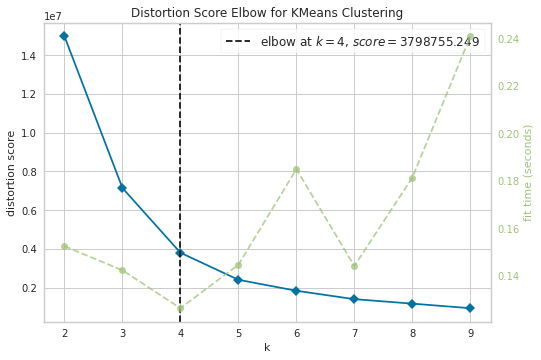

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=34), k=None)

In [13]:
#Use Elbow method to determine the number of cluster to be formed
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

df_s, y = load_nfl()

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=34), df_s, k=(2,10))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app


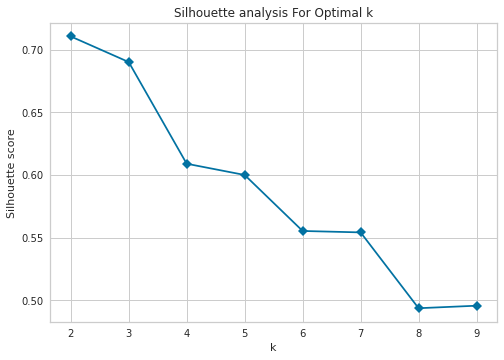

In [14]:
#Verify optimal number of clusers on the basis of silhouette scores
from sklearn.metrics import silhouette_score
#range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18]
range_n_clusters = np.arange(2, 10, 1)

silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_s)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(df_s, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-',marker='D')
plt.xlabel("k") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [15]:
#Assigning cluster label to each instance of the dataframe
# set number of clusters
kclusters = 4
df_clustering = df#.drop('status_type', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
# add clustering labels
df_clustering['Cluster Labels'] = kmeans.labels_
# Sort by cluster
df_clustering.sort_values(['Cluster Labels'], inplace=True)

df_clustering.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster Labels
0,1,3,3949,529,512,262,432,92,3,1,1,0,0
2186,2187,1,6809,23,0,0,23,0,0,0,0,0,0
2187,2188,1,6818,20,22,0,20,0,0,0,0,0,0
2188,2189,1,6817,24,24,0,24,0,0,0,0,0,0
2189,2190,1,6816,24,30,0,24,0,0,0,0,0,0


In [16]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster Labels
0,1,3,3949,529,512,262,432,92,3,1,1,0,0
2186,2187,1,6809,23,0,0,23,0,0,0,0,0,0
2187,2188,1,6818,20,22,0,20,0,0,0,0,0,0
2188,2189,1,6817,24,24,0,24,0,0,0,0,0,0
2189,2190,1,6816,24,30,0,24,0,0,0,0,0,0


In [17]:
a = df["Cluster Labels"].to_numpy() 
b = df_clustering["Cluster Labels"].to_numpy() 
#b = b[:490] 

In [18]:
#Validating obtained clusters using external 
#cluster validation approaches like rand_score and adjusted_rand_score
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(a,b)


1.0

###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



In [19]:
df3 = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv')

In [20]:
df3.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [21]:
df3.shape

(59, 5)

In [22]:
df3.dtypes

fruit_label      int64
mass             int64
width          float64
height         float64
color_score    float64
dtype: object

In [23]:
from sklearn.preprocessing import StandardScaler
df3_scaler = StandardScaler()
df3_s = df3_scaler. fit_transform(df3)
df3_s

array([[-1.2877072 ,  0.52944179,  1.59869024, -0.29139659, -2.79359541],
       [-1.2877072 ,  0.30946246,  1.10485399, -0.66192242, -2.26868417],
       [-1.2877072 ,  0.23613601,  0.36409961, -0.36550175, -2.13745636],
       [-0.45282011, -1.41370901, -1.11740915, -2.21813091,  0.48709984],
       [-0.45282011, -1.45037224, -1.36432727, -2.29223608,  0.35587203],
       [-0.45282011, -1.52369868, -1.6112454 , -2.51455158,  0.09341641],
       [-0.45282011, -1.52369868, -1.48778634, -2.51455158,  0.61832765],
       [-0.45282011, -1.59702513, -1.6112454 , -2.73686708,  0.61832765],
       [-1.2877072 ,  0.27279923, -0.00627758,  0.07912925,  2.06183356],
       [-1.2877072 ,  0.16280957,  0.36409961, -0.51371209,  1.66815013],
       [-1.2877072 ,  0.0528199 , -0.25319571, -0.29139659,  2.19306137],
       [-1.2877072 ,  0.16280957, -0.00627758, -0.06908109,  2.06183356],
       [-1.2877072 , -0.16715944, -0.12973664, -0.43960692,  1.53692232],
       [-1.2877072 ,  0.01615667,  0.2

In [24]:
from sklearn.decomposition import PCA
pca_df3 = PCA(n_components=2)
principalComponents_df3 = pca_df3.fit_transform(df3)
principalComponents_df3

array([[ 2.88854639e+01, -1.86082785e+00],
       [ 1.68750937e+01, -2.01300488e+00],
       [ 1.28741031e+01, -1.63142484e+00],
       [-7.71606360e+01, -1.53086609e+00],
       [-7.91643511e+01, -1.54394397e+00],
       [-8.31706837e+01, -1.66616621e+00],
       [-8.31693852e+01, -1.68362088e+00],
       [-8.71744170e+01, -1.82297977e+00],
       [ 1.48788097e+01, -1.22703699e+00],
       [ 8.87185005e+00, -1.72978447e+00],
       [ 2.87104869e+00, -1.41237420e+00],
       [ 8.87698676e+00, -1.30523007e+00],
       [-9.12827235e+00, -1.45992538e+00],
       [ 8.82716491e-01, -1.21071913e+00],
       [-1.11170194e+01, -1.41740212e+00],
       [-7.11952835e+00, -1.59018957e+00],
       [-7.11479647e+00, -1.32333586e+00],
       [ 4.88301530e+00, -1.33837296e+00],
       [-1.12334322e+00, -1.60544398e+00],
       [-1.12314025e+00, -1.52651413e+00],
       [-3.11691619e+00, -1.34064880e+00],
       [-7.11892947e+00, -1.35483113e+00],
       [-2.31215779e+01, -1.40133615e+00],
       [ 6.

In [25]:
principal_df3_x = pd.DataFrame(data = principalComponents_df3
             , columns = ['principal component 1', 'principal component 2'])
principal_df3_x

,principal component 1,principal component 2
0,28.885464,-1.860828
1,16.875094,-2.013005
2,12.874103,-1.631425
3,-77.160636,-1.530866
4,-79.164351,-1.543944
5,-83.170684,-1.666166
6,-83.169385,-1.683621
7,-87.174417,-1.822980
8,14.878810,-1.227037
9,8.871850,-1.729784


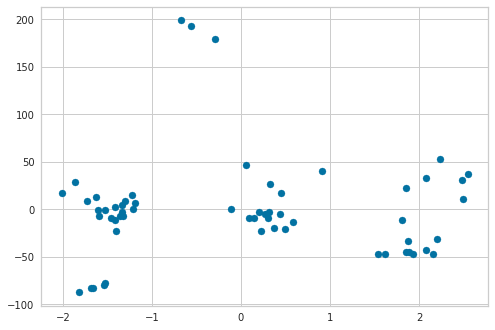

In [26]:
fig, axes = plt.subplots(1,1)
plt.scatter(principal_df3_x["principal component 2"], principal_df3_x["principal component 1"])
plt.show()

In [27]:
pca1_df3 = PCA(n_components=4)
principalComponents1_df3 = pca1_df3.fit_transform(df3)
principalComponents1_df3

array([[ 2.88854639e+01, -1.86082785e+00, -4.65843728e-01,
         5.50060462e-01],
       [ 1.68750937e+01, -2.01300488e+00, -1.63474782e-01,
         3.31549181e-01],
       [ 1.28741031e+01, -1.63142484e+00, -4.10891947e-01,
        -2.19881425e-01],
       [-7.71606360e+01, -1.53086609e+00,  1.11683335e+00,
         6.77613139e-02],
       [-7.91643511e+01, -1.54394397e+00,  1.20690658e+00,
        -9.44033868e-02],
       [-8.31706837e+01, -1.66616621e+00,  1.42497170e+00,
        -2.21125235e-01],
       [-8.31693852e+01, -1.68362088e+00,  1.40491362e+00,
        -1.28685204e-01],
       [-8.71744170e+01, -1.82297977e+00,  1.60294926e+00,
        -1.61121410e-01],
       [ 1.48788097e+01, -1.22703699e+00, -7.91006186e-01,
        -5.93705190e-01],
       [ 8.87185005e+00, -1.72978447e+00, -3.11192322e-01,
        -1.88292779e-01],
       [ 2.87104869e+00, -1.41237420e+00, -5.28596088e-01,
        -6.17185549e-01],
       [ 8.87698676e+00, -1.30523007e+00, -7.18755068e-01,
      

In [28]:
principal_df3_x1 = pd.DataFrame(data = principalComponents1_df3
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4'])
principal_df3_x1

,principal component 1,principal component 2,principal component 3,principal component 4
0,28.885464,-1.860828,-0.465844,0.550060
1,16.875094,-2.013005,-0.163475,0.331549
2,12.874103,-1.631425,-0.410892,-0.219881
3,-77.160636,-1.530866,1.116833,0.067761
4,-79.164351,-1.543944,1.206907,-0.094403
5,-83.170684,-1.666166,1.424972,-0.221125
6,-83.169385,-1.683621,1.404914,-0.128685
7,-87.174417,-1.822980,1.602949,-0.161121
8,14.878810,-1.227037,-0.791006,-0.593705
9,8.871850,-1.729784,-0.311192,-0.188293


In [29]:
print(pca1_df3.explained_variance_ratio_)

[9.99082568e-01 7.21661472e-04 1.68906865e-04 2.53120051e-05]
